# EDA

In [50]:
import numpy as np 
import pandas as pd
import torch
import os
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
from os.path import dirname, abspath

In [51]:
#Get paths 
train_corr = "/datasets/MaskedFace-Net/train/covered"
train_incorr = "/datasets/MaskedFace-Net/train/incorrect"
train_uncovered = "/datasets/MaskedFace-Net/train/uncovered"

#Holdout == Test set
holdout_corr = "/datasets/MaskedFace-Net/holdout/covered"
holdout_incorr = "/datasets/MaskedFace-Net/holdout/incorrect"
holdout_uncovered = "/datasets/MaskedFace-Net/holdout/uncovered"

val_corr = "/datasets/MaskedFace-Net/validation/covered"
val_incorr = "/datasets/MaskedFace-Net/validation/incorrect"
val_uncovered = "/datasets/MaskedFace-Net/validation/uncovered"

In [52]:
train_corr_imgs = os.listdir(train_corr)
train_incorr_imgs = os.listdir(train_incorr)
train_uncovered_imgs = os.listdir(train_uncovered)

In [53]:
train_dim = np.array([len(train_corr_imgs), len(train_incorr_imgs), len(train_uncovered_imgs)])
pd.DataFrame(train_dim, columns = ['Size'], index = ['Train Mask Correct', 'Train Mask Incorrect', 'Train Mask Uncovered']).to_csv('../results/data_dim.csv')

In [54]:
%%time
width = []
height = []

for i in train_corr_imgs:
    img = Image.open(train_corr + '/' + i)
    shape = img.size
    width.append(shape[0])
    height.append(shape[1])
    
for i in train_incorr_imgs:
    img = Image.open(train_incorr + '/' + i)
    shape = img.size
    width.append(shape[0])
    height.append(shape[1])
    
for i in train_uncovered_imgs:
    img = Image.open(train_uncovered + '/' + i)
    shape = img.size
    width.append(shape[0])
    height.append(shape[1])

CPU times: user 5.14 s, sys: 5.85 s, total: 11 s
Wall time: 23.3 s


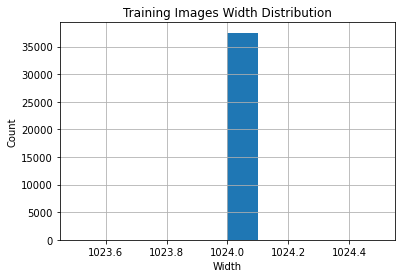

In [57]:
pd.Series(width).hist()
plt.title('Training Images Width Distribution')
plt.xlabel('Width')
plt.ylabel('Count')
plt.savefig('../results/TrainingWidth.jpg')

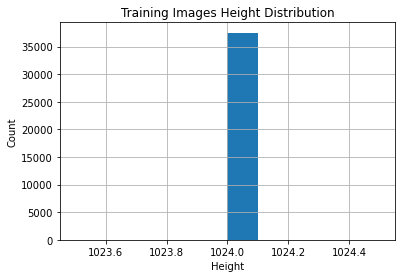

In [56]:
pd.Series(height).hist()
plt.title('Training Images Height Distribution')
plt.xlabel('Height')
plt.ylabel('Count')
plt.savefig('../results/TrainingHeight.jpg')

In [63]:
img = Image.open(train_corr + '/' + train_corr_imgs[0])
img.save('../results/sample1.jpg')
img = Image.open(train_incorr + '/' + train_incorr_imgs[0])
img.save('../results/sample2.jpg')
img = Image.open(train_uncovered + '/' + train_uncovered_imgs[0])
img.save('../results/sample3.jpg')